In [1]:
import os
os.chdir("D:\\University\\Study Materials\\Capstone\\the-movies-dataset")

In [2]:
import pandas as pd

In [3]:
# Setting Display options 
pd.options.display.max_columns = None

# pd.set_option('display.max_columns', None)  ## not working (was for diplaying full column width) 

In [4]:
movies = pd.read_csv("tmdb_5000_movies.csv")

credits = pd.read_csv("tmdb_5000_credits.csv")

In [5]:
movies.info(), credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

(None, None)

In [6]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [7]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [8]:
movies.shape, credits.shape

((4803, 20), (4803, 4))

In [9]:
master = pd.merge(movies, credits,
                 left_on = "id", right_on = "movie_id",
                 how = "inner")

In [10]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [11]:
master.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [12]:
master.id.nunique(), master.original_title.nunique()  #2 duplicates in original title

(4803, 4801)

In [13]:
#finding duplicates
from collections import Counter

d =  Counter(master.original_title)
res = [k for k, v in d.items() if v > 1]
print(res)

['Batman', 'Out of the Blue']


In [14]:
master[master.original_title == "Batman"] #not duplicate

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096,268,Batman,"[{""cast_id"": 5, ""character"": ""Jack Napier/The ...","[{""credit_id"": ""52fe422fc3a36847f800aa4b"", ""de..."
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203,2661,Batman,"[{""cast_id"": 17, ""character"": ""Batman / Bruce ...","[{""credit_id"": ""52fe4363c3a36847f80509a7"", ""de..."


In [15]:
master[master.original_title == "Out of the Blue"] #not duplicate

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17,39269,Out of the Blue,"[{""cast_id"": 2, ""character"": ""Don"", ""credit_id...","[{""credit_id"": ""52fe47099251416c9106826f"", ""de..."
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18,10844,Out of the Blue,"[{""cast_id"": 12, ""character"": ""Nick Harvey"", ""...","[{""credit_id"": ""52fe43c19251416c7501cceb"", ""de..."


In [16]:
#missing values
master.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

4803 unique movies available
some variables contains missing values

In [17]:
master['runtime'] = master['runtime'].fillna(master['runtime'].median()) #imputing nan with median to facilitate EDA
master.runtime.isna().sum()

0

# EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

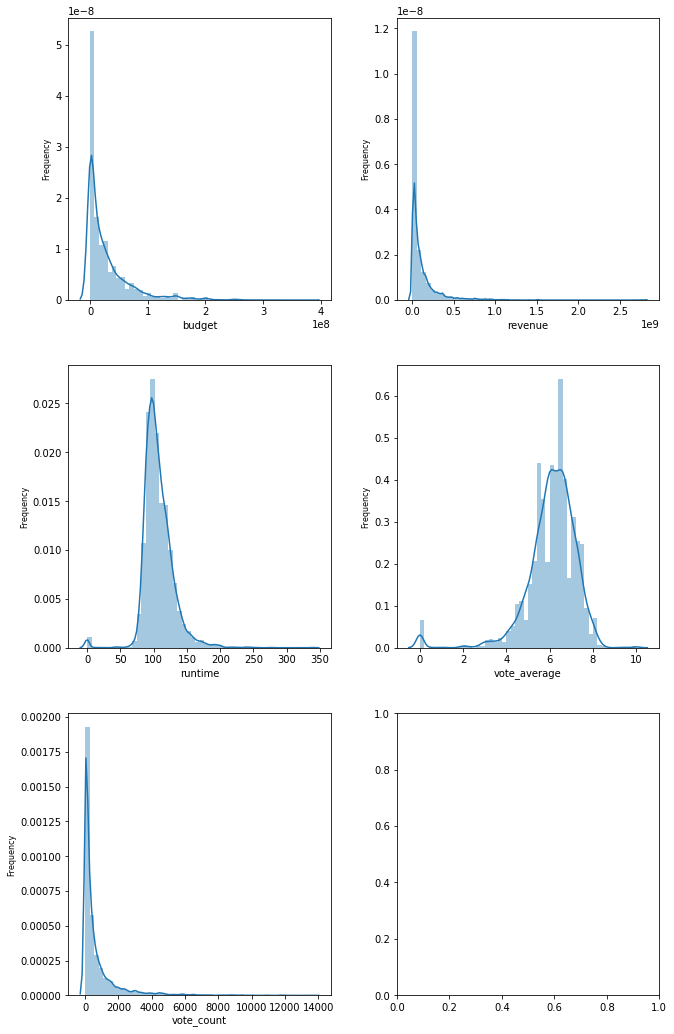

In [19]:
#histograms
col_names_hist = ['budget', 'revenue', 
                 'runtime', 'vote_average', 'vote_count']

fig, ax = plt.subplots(nrows = 3,ncols = 2, figsize=(10,15))
for i, col in enumerate(col_names_hist):
    sns.distplot(master[col], hist = True, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_ylabel('Frequency', fontsize=8)
fig.tight_layout(pad =  3.0)
plt.show()

In [20]:
master.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.874245,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.607364,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


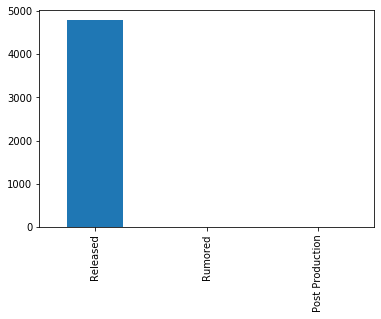

In [21]:
fig, ax = plt.subplots()
master['status'].value_counts().plot(ax=ax, kind='bar');

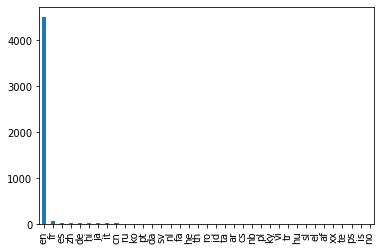

In [22]:
fig, ax = plt.subplots()
master['original_language'].value_counts().plot(ax=ax, kind='bar');

In [23]:
master.status.value_counts(), master.original_language.value_counts()

(Released           4795
 Rumored               5
 Post Production       3
 Name: status, dtype: int64, en    4505
 fr      70
 es      32
 zh      27
 de      27
 hi      19
 ja      16
 it      14
 cn      12
 ru      11
 ko      11
 pt       9
 da       7
 sv       5
 nl       4
 fa       4
 he       3
 th       3
 ro       2
 id       2
 ta       2
 ar       2
 cs       2
 nb       1
 pl       1
 ky       1
 vi       1
 tr       1
 hu       1
 sl       1
 el       1
 af       1
 xx       1
 te       1
 ps       1
 is       1
 no       1
 Name: original_language, dtype: int64)

# Write Observation from the EDA

# Data Munging

Demographic filtering

IMDB Weighted Rating
weighted rank (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

 where:
  R = average for the movie
  v = number of votes for the movie
  m = minimum votes required to be listed in the chart
  C = the mean vote across the whole report

In [24]:
# Deriving the paramaeters for Weighted Rating
C = master.vote_average.mean()
C

6.092171559442011

In [25]:
# deciding the minimum number of votes required to be listed in the chart
m = master.vote_count.quantile(0.85) #all movies having more than votes than 85% movies in the list
m

1300.6999999999998

In [26]:
#filtering out movies qualified for the chart
hv_movies = master.loc[master.vote_count >= m] 

In [27]:
hv_movies.shape #721 movies qualify

(721, 24)

In [28]:
master['Weighted_rating'] = ((master.vote_count/(master.vote_count + m))* master.vote_average)+((m/(master.vote_count+m))*C)

In [29]:
master = master.sort_values('Weighted_rating', ascending = False)
master[['id','original_title',
      'vote_average', 'vote_count', 'Weighted_rating']].head(10)

,id,original_title,vote_average,vote_count,Weighted_rating
1881,278,The Shawshank Redemption,8.5,8205,8.170528
662,550,Fight Club,8.3,9413,8.031958
3232,680,Pulp Fiction,8.3,8428,8.004820
65,155,The Dark Knight,8.2,12002,7.993903
3337,238,The Godfather,8.4,5893,7.982719
96,27205,Inception,8.1,13752,7.926504
809,13,Forrest Gump,8.2,7927,7.902889
95,157336,Interstellar,8.1,10867,7.885368
329,122,The Lord of the Rings: The Return of the King,8.1,8064,7.821125
1990,1891,The Empire Strikes Back,8.2,5879,7.818138


In [30]:
#sorting movies based on popularity
pop_movie = master.sort_values('popularity', ascending = False)

In [31]:
pop_movie[['original_title', 'popularity', 'vote_average']].head(10) #top 10 most popular movies

,original_title,popularity,vote_average
546,Minions,875.581305,6.4
95,Interstellar,724.247784,8.1
788,Deadpool,514.569956,7.4
94,Guardians of the Galaxy,481.098624,7.9
127,Mad Max: Fury Road,434.278564,7.2
28,Jurassic World,418.708552,6.5
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,7.5
82,Dawn of the Planet of the Apes,243.791743,7.3
200,The Hunger Games: Mockingjay - Part 1,206.227151,6.6
88,Big Hero 6,203.734590,7.8


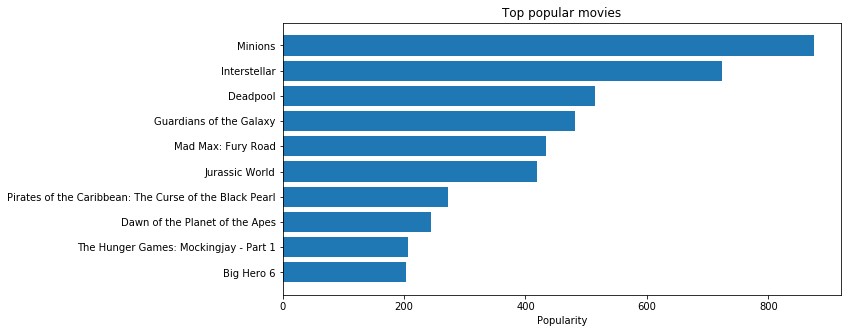

In [32]:
#plot for most popular movies
fig, ax = plt.subplots(figsize =(10, 5)) 
ax.barh(pop_movie.original_title.head(10), pop_movie.popularity.head(10))
ax.set_title("Top popular movies")
ax.set_xlabel("Popularity")
ax.invert_yaxis()
plt.show();

Content Based Filtering

In [33]:
master.overview.head(3)

1881    Framed in the 1940s for the double murder of h...
662     A ticking-time-bomb insomniac and a slippery s...
3232    A burger-loving hit man, his philosophical par...
Name: overview, dtype: object

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf = TfidfVectorizer(stop_words='english') #removing all the english stop words

In [36]:
master.overview.isna().sum() #3 missing values present

3

In [37]:
#replacing the missing value with an empty string
master.overview = master.overview.fillna('')

In [38]:
master.overview.isna().sum()

0

In [39]:
tfidf_matrix = tfidf.fit_transform(master.overview)

tfidf_matrix.shape

(4803, 20978)

In [40]:
#calculating cosine similarity
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [41]:
# a reverse map of indices and movie titles
indices = pd.Series(master.index, index=master.title_x).drop_duplicates()

In [42]:
# function to generate similar movies
def recommender(title):
    idx = indices[title]
    scores = sorted(list(enumerate(cosine_sim[idx])), key=lambda x: x[1], reverse=True)
    scores = scores[1:6] #top 5 similar movies
    movie_indices = [i[0] for i in scores]
    return master.title_x.iloc[movie_indices]

In [43]:
recommender('The Dark Knight Rises')

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
Name: title_x, dtype: object

In [44]:
recommender('Cape Fear')

1656    Hoodwinked Too! Hood VS. Evil
1243                     Mean Streets
4462               The Young Unknowns
185                 War of the Worlds
4403                   The Jimmy Show
Name: title_x, dtype: object

## Adding more data for similar movie filtering

In [45]:
#pd.set_option('display.max_colwidth', 1000) ## displays full length cells
master.cast.head(1) #it's a stringified list

1881    [{"cast_id": 3, "character": "Andy Dufresne", ...
Name: cast, dtype: object

In [46]:
master.crew.head(1) #can parse director name from this column

1881    [{"credit_id": "52fe4231c3a36847f800b153", "de...
Name: crew, dtype: object

In [47]:
# converting back to usable list
from ast import literal_eval

features = ['genres', 'keywords', 'cast', 'crew']
for feature in features:
    master[feature] = master[feature].apply(literal_eval)

In [48]:
#functions for extracting details
#director
import numpy as np

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# function for extracting important names
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [49]:
# new director, cast, genres and keywords features that are in a suitable form.
master['director'] = master.crew.apply(get_director)

In [50]:
features = ['genres', 'keywords', 'cast']
for feature in features:
    master[feature] = master[feature].apply(get_list)

In [51]:
master[['title_x', 'cast', 'director', 'keywords', 'genres']].head(5)  #proper format

,title_x,cast,director,keywords,genres
1881,The Shawshank Redemption,"[Tim Robbins, Morgan Freeman, Bob Gunton]",Frank Darabont,"[prison, corruption, police brutality]","[Drama, Crime]"
662,Fight Club,"[Edward Norton, Brad Pitt, Meat Loaf]",David Fincher,"[support group, dual identity, nihilism]",[Drama]
3232,Pulp Fiction,"[John Travolta, Samuel L. Jackson, Uma Thurman]",Quentin Tarantino,"[transporter, brothel, drug dealer]","[Thriller, Crime]"
65,The Dark Knight,"[Christian Bale, Heath Ledger, Aaron Eckhart]",Christopher Nolan,"[dc comics, crime fighter, secret identity]","[Drama, Action, Crime]"
3337,The Godfather,"[Marlon Brando, Al Pacino, James Caan]",Francis Ford Coppola,"[italy, love at first sight, loss of father]","[Drama, Crime]"


In [52]:
#converting the names and keyword instances into lowercase and strip all the spaces between them
def clean_up(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [53]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    master[feature] = master[feature].apply(clean_up)

In [54]:
# combining everything for vectorizer
def combine_all(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
master['mix'] = master.apply(combine_all, axis=1)

In [55]:
master.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,Weighted_rating,director,mix
1881,25000000,"[drama, crime]",NaN,278,"[prison, corruption, policebrutality]",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,278,The Shawshank Redemption,"[timrobbins, morganfreeman, bobgunton]","[{'credit_id': '52fe4231c3a36847f800b153', 'de...",8.170528,frankdarabont,prison corruption policebrutality timrobbins m...


In [56]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(master.mix)

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim1 = cosine_similarity(count_matrix, count_matrix)

In [58]:
master01 = master.reset_index()
indices = pd.Series(master01.index, index=master01.title_x)

In [59]:
def recommend_movies(title):
    idx = indices[title]
    scores = sorted(list(enumerate(cosine_sim1[idx])), key=lambda x: x[1], reverse=True)
    scores = scores[1:6] #top 5 similar movies
    movie_indices = [i[0] for i in scores]
    return master.title_x.iloc[movie_indices]

In [60]:
recommend_movies('The Dark Knight Rises')

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
Name: title_x, dtype: object

Collaborative Filtering

In [61]:
# importing another dataset for getting user IDs
ratings = pd.read_csv("ratings_small.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [62]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()

In [63]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [64]:
svd = SVD()

In [65]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8960  0.8987  0.8959  0.8989  0.9030  0.8985  0.0026  
MAE (testset)     0.6901  0.6932  0.6873  0.6904  0.6962  0.6914  0.0031  
Fit time          3.40    3.50    3.28    3.32    3.33    3.37    0.08    
Test time         0.09    0.14    0.09    0.14    0.09    0.11    0.03    


{'test_rmse': array([0.8959635 , 0.89870357, 0.8959123 , 0.89892635, 0.90295294]),
 'test_mae': array([0.69010665, 0.6932362 , 0.68727601, 0.6903558 , 0.69624282]),
 'fit_time': (3.397810459136963,
  3.500910758972168,
  3.2761034965515137,
  3.3225817680358887,
  3.3325343132019043),
 'test_time': (0.08876562118530273,
  0.14362311363220215,
  0.09075736999511719,
  0.14461851119995117,
  0.08875465393066406)}

In [66]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [67]:
ratings[ratings.userId == 30].head(10)

,userId,movieId,rating,timestamp
5048,30,1,4.0,944943070
5049,30,2,2.0,945277634
5050,30,6,4.0,945276746
5051,30,8,4.0,968786809
5052,30,11,4.0,948141296
5053,30,14,4.0,945276564
5054,30,16,5.0,945115684
5055,30,18,2.0,945277971
5056,30,21,5.0,945276705
5057,30,23,4.0,945278756


In [68]:
svd.predict(30,23)

Prediction(uid=30, iid=23, r_ui=None, est=3.365712732968289, details={'was_impossible': False})

Hybrid Recommender

In [69]:
link = pd.read_csv("links_small.csv")
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [70]:
link.info() #null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
imdbId     9125 non-null int64
tmdbId     9112 non-null float64
dtypes: float64(1), int64(2)
memory usage: 213.9 KB


In [71]:
#removing NAs
link = link.dropna()

In [72]:
link.tmdbId = link.tmdbId.astype(int)

In [73]:
link.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9112 non-null int64
imdbId     9112 non-null int64
tmdbId     9112 non-null int32
dtypes: int32(1), int64(2)
memory usage: 249.2 KB


In [74]:
metadata = pd.read_csv("movies_metadata.csv")
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

C:\Users\hasna\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [75]:
metadata.id = metadata.id.astype(int)

ValueError: invalid literal for int() with base 10: '1997-08-20'

In [ ]:
smd = metadata[metadata['id'].isin(link)]
smd.shape

In [ ]:
master.id = master.id.astype(int)

In [ ]:
#merge
master_final = pd.merge(master, link,
                 left_on = "id", right_on = "tmdbId",
                 how = "inner")
master_final.info()

In [ ]:
#master_final01 = master_final.set_index('title_x')
indices_map = master_final.set_index('id')

In [ ]:
def get_recommendation_hybrid(userId, title):
    idx = indices[title]
    #tmdbId = master_final01.loc[title]['id']
    #movie_id = master_final01.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim1[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = master.iloc[movie_indices][['title_x', 'vote_count', 'vote_average', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [ ]:
get_recommendation_hybrid(2,'Avatar')